# Rimar Task 6.3

# Table of Contents
## 1. Import Data and Libraries
## 2. Wrangle and Clean Data
## 3. Plot Spatial Analysis
### -Make start and end station DFs
### -Create maps
## 4. Graduated Symbol Station Maps
## 5. Analysis

# 1. Import Data and Libraries

In [60]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import json
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
#Display matplotlib visuals 
%matplotlib inline

In [7]:
#Import data
path = r"C:\Users\carol\Documents\Career Foundry\6 Advanced Analytics & Dashboard Design\A6 Project"
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'citibike.csv'), index_col = False)

In [8]:
#Import .json
nyc_nbh = gpd.read_file(os.path.join(path, '02 Data', 'Original Data', 'nyc-neighborhoods.geo.json'))

# 2. Wrangle + Clean Data

In [9]:
#Review data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,Pn4kpQ,16699,Sun,16,9/22/2013 16:10,72,W 52 St & 11 Ave,40.767272,-73.993929,9/22/2013 16:33,290,2 Ave & E 58 St,40.760203,-73.964785,1376,Subscriber,1986.0,2
1,FHenrJ,16837,Fri,17,9/20/2013 17:44,72,W 52 St & 11 Ave,40.767272,-73.993929,9/20/2013 17:49,385,E 55 St & 2 Ave,40.757973,-73.966033,303,Subscriber,1980.0,1
2,NAIdSB,14778,Sat,15,9/14/2013 15:52,72,W 52 St & 11 Ave,40.767272,-73.993929,9/14/2013 15:56,305,E 58 St & 3 Ave,40.760958,-73.967245,232,Subscriber,1971.0,1
3,P7EP9i,19985,Thu,19,9/19/2013 19:25,72,W 52 St & 11 Ave,40.767272,-73.993929,9/19/2013 19:38,464,E 56 St & 3 Ave,40.759345,-73.967597,795,Subscriber,1984.0,1
4,U0UCWc,19765,Mon,21,9/16/2013 21:54,72,W 52 St & 11 Ave,40.767272,-73.993929,9/16/2013 22:09,367,E 53 St & Lexington Ave,40.758281,-73.970694,891,Subscriber,1980.0,1


In [10]:
#Check for missing values
df.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                 6979
gender                        0
dtype: int64

In [11]:
#Check for duplicates
dups = df.duplicated()

In [12]:
dups.shape

(50000,)

In [13]:
#Check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No duplicates or mixed type columns. There are missing values in birth year but I won't be using that data in this analysis and I know from previous analyses that's just related to non-subscriber users so it doesn't affect anything else used in this analysis either.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

# 3. Plot Spatial Analysis

I'm going to make 2 maps to examine the frequency usage of the start and end stations and see which stations are most popular as starting points and destinations, respectively.

## Make Start and End Station DFs
First I'm going to make 2 new dataframes, one of the start stations and one of the end stations. Each will contain the station, it's position w/ lat and long, and the count of each station number.

### Create count of start stations

In [15]:
#Count how many times each station occurs
df_start_count = df['start_station_id'].value_counts(dropna = False)

In [16]:
#Check results
df_start_count

459     536
293     505
519     503
497     496
426     465
       ... 
119      11
321      11
372       8
2005      5
2001      5
Name: start_station_id, Length: 330, dtype: int64

In [17]:
type(df_start_count)

pandas.core.series.Series

In [18]:
#Convert df_start_count to dataframe
df_start_count = df_start_count.to_frame()

In [19]:
#Check results
df_start_count

,start_station_id
459,536
293,505
519,503
497,496
426,465
...,...
119,11
321,11
372,8
2005,5


In [20]:
type(df_start_count)

pandas.core.frame.DataFrame

In [21]:
#Add an index
df_start_count = df_start_count.reset_index()

In [22]:
#Check column names
df_start_count.columns

Index(['index', 'start_station_id'], dtype='object')

In [23]:
#Rename columns
df_start_count.rename(columns={'index':'start_station_id', 'start_station_id':'count'}, inplace = True)

In [24]:
#Check results
df_start_count.head()

,start_station_id,count
0,459,536
1,293,505
2,519,503
3,497,496
4,426,465


### Create dataframe of only necessary columns (start station id and location)

In [25]:
#Drop duplicate start_station_id values to create a dataframe of individual start stations
df_start = df.drop_duplicates(subset = 'start_station_id')

In [26]:
#Check results
df_start.shape

(330, 18)

In [27]:
#Drop unnecessary columns
df_start = df_start.drop(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time', 'end_time', 
                   'end_station_name', 'trip_duration', 'birth_year', 'gender', 'subscriber', 'end_station_id', 
                         'end_station_latitude', 'end_station_longitude'], axis=1)

In [28]:
#Check results
df_start.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude
0,72,W 52 St & 11 Ave,40.767272,-73.993929
161,79,Franklin St & W Broadway,40.719116,-74.006667
300,82,St James Pl & Pearl St,40.711174,-74.000165
371,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
454,116,W 17 St & 8 Ave,40.741776,-74.001497


In [29]:
#Merge station count and station location on the station id column
df_start_merged = df_start.merge(df_start_count, on = 'start_station_id', indicator = True)

In [30]:
#Check results
df_start_merged.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,count,_merge
0,72,W 52 St & 11 Ave,40.767272,-73.993929,161,both
1,79,Franklin St & W Broadway,40.719116,-74.006667,139,both
2,82,St James Pl & Pearl St,40.711174,-74.000165,71,both
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,83,both
4,116,W 17 St & 8 Ave,40.741776,-74.001497,301,both


In [31]:
#Drop merge column
df_start_merged = df_start_merged.drop(['_merge'], axis=1)

In [32]:
#Check results
df_start_merged.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,count
0,72,W 52 St & 11 Ave,40.767272,-73.993929,161
1,79,Franklin St & W Broadway,40.719116,-74.006667,139
2,82,St James Pl & Pearl St,40.711174,-74.000165,71
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,83
4,116,W 17 St & 8 Ave,40.741776,-74.001497,301


### Create count of end stations

In [33]:
#Count how many times each station occurs
df_end_count = df['end_station_id'].value_counts(dropna = False)

In [34]:
#Check results
df_end_count

497     572
459     525
426     470
521     439
293     430
       ... 
321      10
289       9
372       7
2001      7
2005      6
Name: end_station_id, Length: 330, dtype: int64

In [35]:
type(df_end_count)

pandas.core.series.Series

In [36]:
#Convert df_start_count to dataframe
df_end_count = df_end_count.to_frame()

In [37]:
#Check results
df_end_count

,end_station_id
497,572
459,525
426,470
521,439
293,430
...,...
321,10
289,9
372,7
2001,7


In [38]:
type(df_end_count)

pandas.core.frame.DataFrame

In [39]:
#Add an index
df_end_count = df_end_count.reset_index()

In [40]:
#Check column names
df_end_count.columns

Index(['index', 'end_station_id'], dtype='object')

In [41]:
#Rename columns
df_end_count.rename(columns={'index':'end_station_id', 'end_station_id':'count'}, inplace = True)

In [42]:
#Check results
df_end_count.head()

,end_station_id,count
0,497,572
1,459,525
2,426,470
3,521,439
4,293,430


### Create dataframe of only necessary columns (end station id and location)

In [43]:
#Drop duplicate start_station_id values to create a dataframe of individual start stations
df_end = df.drop_duplicates(subset = 'end_station_id')

In [44]:
#Check results
df_end.shape

(330, 18)

In [45]:
#Drop unnecessary columns
df_end = df_end.drop(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time', 'start_station_name', 'end_time', 
                   'trip_duration', 'birth_year', 'gender', 'subscriber', 'start_station_id', 
                         'start_station_latitude', 'start_station_longitude'], axis=1)

In [46]:
#Check results
df_end.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,290,2 Ave & E 58 St,40.760203,-73.964785
1,385,E 55 St & 2 Ave,40.757973,-73.966033
2,305,E 58 St & 3 Ave,40.760958,-73.967245
3,464,E 56 St & 3 Ave,40.759345,-73.967597
4,367,E 53 St & Lexington Ave,40.758281,-73.970694


In [47]:
#Merge station count and station location on the station id column
df_end_merged = df_end.merge(df_end_count, on = 'end_station_id', indicator = True)

In [48]:
#Check results
df_end_merged.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,count,_merge
0,290,2 Ave & E 58 St,40.760203,-73.964785,159,both
1,385,E 55 St & 2 Ave,40.757973,-73.966033,91,both
2,305,E 58 St & 3 Ave,40.760958,-73.967245,198,both
3,464,E 56 St & 3 Ave,40.759345,-73.967597,141,both
4,367,E 53 St & Lexington Ave,40.758281,-73.970694,153,both


In [49]:
#Drop merge column
df_end_merged = df_end_merged.drop(['_merge'], axis=1)

In [50]:
#Check results
df_end_merged.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,count
0,290,2 Ave & E 58 St,40.760203,-73.964785,159
1,385,E 55 St & 2 Ave,40.757973,-73.966033,91
2,305,E 58 St & 3 Ave,40.760958,-73.967245,198
3,464,E 56 St & 3 Ave,40.759345,-73.967597,141
4,367,E 53 St & Lexington Ave,40.758281,-73.970694,153


## Create Maps

### Base Map

<Axes: >

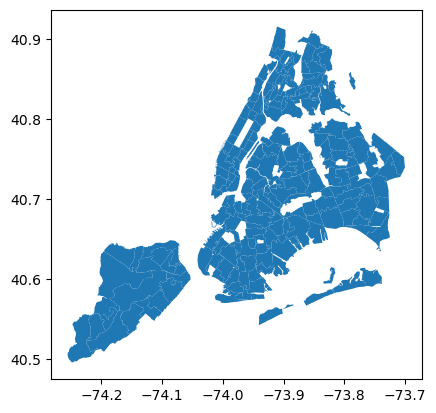

In [51]:
nyc_nbh.plot()

### Start Station Point Map

In [52]:
#Create xy points to plot start station locations
gdf_start = gpd.GeoDataFrame(df_start_merged, geometry=gpd.points_from_xy(df_start_merged.start_station_longitude,
                                                                         df_start_merged.start_station_latitude))

<Axes: >

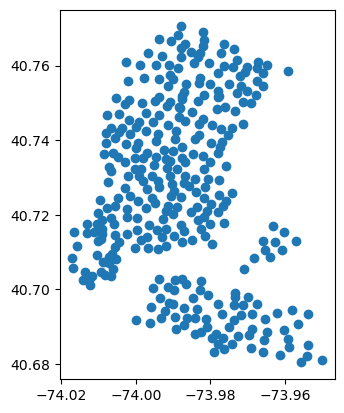

In [53]:
#Check results
gdf_start.plot()

In [54]:
gdf_start.head()

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,count,geometry
0,72,W 52 St & 11 Ave,40.767272,-73.993929,161,POINT (-73.99393 40.76727)
1,79,Franklin St & W Broadway,40.719116,-74.006667,139,POINT (-74.00667 40.71912)
2,82,St James Pl & Pearl St,40.711174,-74.000165,71,POINT (-74.00017 40.71117)
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,83,POINT (-73.97632 40.68383)
4,116,W 17 St & 8 Ave,40.741776,-74.001497,301,POINT (-74.00150 40.74178)


### End Station Point Map

In [55]:
#Create xy points to plot start station locations
gdf_end = gpd.GeoDataFrame(df_end_merged, geometry=gpd.points_from_xy(df_end_merged.end_station_longitude,
                                                                         df_end_merged.end_station_latitude))

<Axes: >

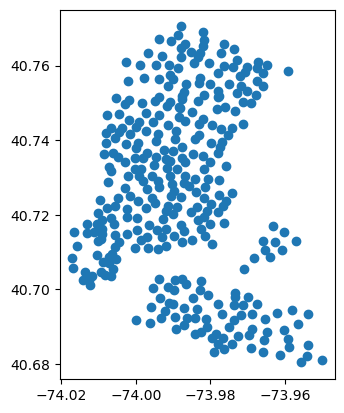

In [56]:
#Check results
gdf_end.plot()

In [57]:
gdf_end.head()

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,count,geometry
0,290,2 Ave & E 58 St,40.760203,-73.964785,159,POINT (-73.96478 40.76020)
1,385,E 55 St & 2 Ave,40.757973,-73.966033,91,POINT (-73.96603 40.75797)
2,305,E 58 St & 3 Ave,40.760958,-73.967245,198,POINT (-73.96724 40.76096)
3,464,E 56 St & 3 Ave,40.759345,-73.967597,141,POINT (-73.96760 40.75935)
4,367,E 53 St & Lexington Ave,40.758281,-73.970694,153,POINT (-73.97069 40.75828)


# 4. Graduated Symbol Station Maps

## Start Station Map

<Axes: >

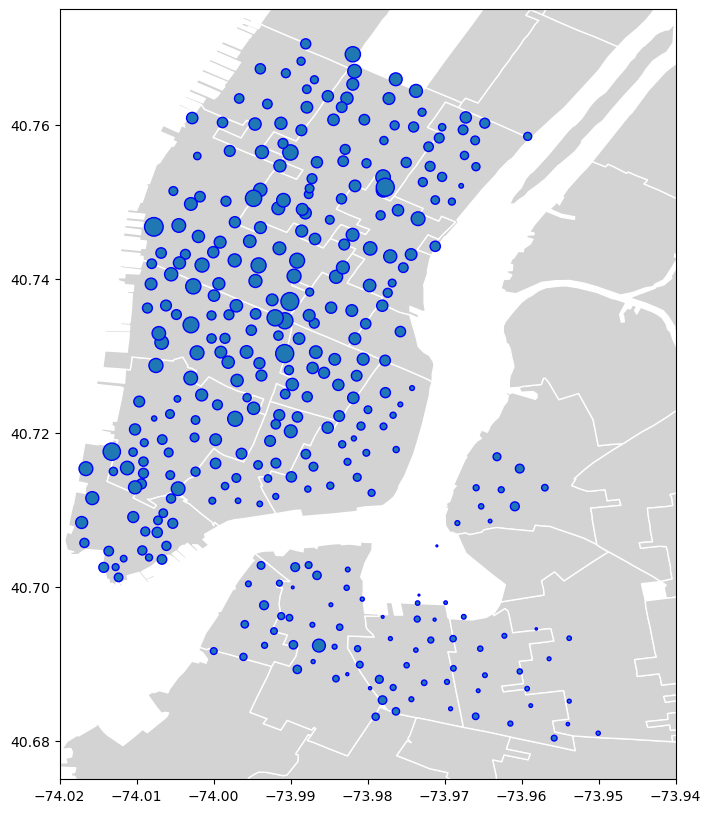

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

xlim = ([-74.02, -73.94])
ylim = ([40.675, 40.775])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nyc_nbh.plot(ax=ax, color = 'lightgray', edgecolor = 'white')
gdf_start.plot(ax=ax, marker = 'o', edgecolors = 'b', markersize = (gdf_start['count']/3))

In [64]:
#Determine top start stations
gdf_start = gdf_start.sort_values(by=['count'], ascending = False)

In [67]:
gdf_start.head(20)

,start_station_id,start_station_name,start_station_latitude,start_station_longitude,count,geometry
234,459,W 20 St & 11 Ave,40.746745,-74.007756,536,POINT (-74.00776 40.74674)
82,293,Lafayette St & E 8 St,40.730287,-73.990765,505,POINT (-73.99076 40.73029)
292,519,Pershing Square N,40.751884,-73.977702,503,POINT (-73.97770 40.75188)
271,497,E 17 St & Broadway,40.737050,-73.990093,496,POINT (-73.99009 40.73705)
204,426,West St & Chambers St,40.717548,-74.013221,465,POINT (-74.01322 40.71755)
294,521,8 Ave & W 31 St,40.750450,-73.994811,410,POINT (-73.99481 40.75045)
163,382,University Pl & E 14 St,40.734927,-73.992005,405,POINT (-73.99201 40.73493)
78,285,Broadway & E 14 St,40.734546,-73.990741,402,POINT (-73.99074 40.73455)
162,380,W 4 St & 7 Ave S,40.734011,-74.002939,386,POINT (-74.00294 40.73401)
252,477,W 41 St & 8 Ave,40.756405,-73.990026,365,POINT (-73.99003 40.75641)


<Axes: ylabel='Frequency'>

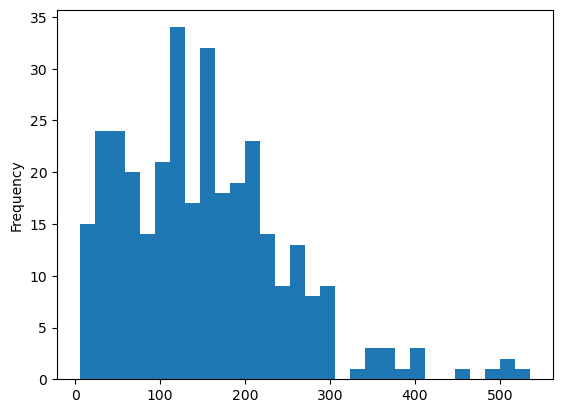

In [73]:
gdf_start['count'].plot.hist(bins = 30)

## End Station Map

<Axes: >

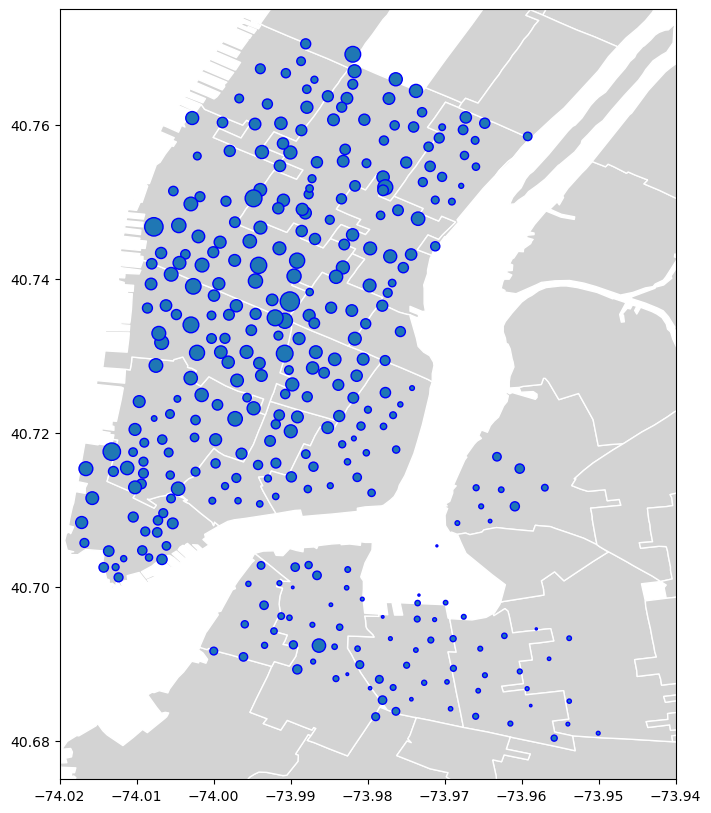

In [74]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

xlim = ([-74.02, -73.94])
ylim = ([40.675, 40.775])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

nyc_nbh.plot(ax=ax, color = 'lightgray', edgecolor = 'white')
gdf_end.plot(ax=ax, marker = 'o', edgecolors = 'b', markersize = (gdf_end['count']/3))

In [75]:
#Determine top start stations
gdf_end = gdf_end.sort_values(by=['count'], ascending = False)

In [76]:
gdf_end.head(20)

,end_station_id,end_station_name,end_station_latitude,end_station_longitude,count,geometry
157,497,E 17 St & Broadway,40.737050,-73.990093,572,POINT (-73.99009 40.73705)
86,459,W 20 St & 11 Ave,40.746745,-74.007756,525,POINT (-74.00776 40.74674)
94,426,West St & Chambers St,40.717548,-74.013221,470,POINT (-74.01322 40.71755)
51,521,8 Ave & W 31 St,40.750450,-73.994811,439,POINT (-73.99481 40.75045)
37,293,Lafayette St & E 8 St,40.730287,-73.990765,430,POINT (-73.99076 40.73029)
118,435,W 21 St & 6 Ave,40.741740,-73.994156,409,POINT (-73.99416 40.74174)
40,382,University Pl & E 14 St,40.734927,-73.992005,390,POINT (-73.99201 40.73493)
71,380,W 4 St & 7 Ave S,40.734011,-74.002939,384,POINT (-74.00294 40.73401)
19,499,Broadway & W 60 St,40.769155,-73.981918,381,POINT (-73.98192 40.76916)
69,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,371,POINT (-74.00264 40.73902)


<Axes: ylabel='Frequency'>

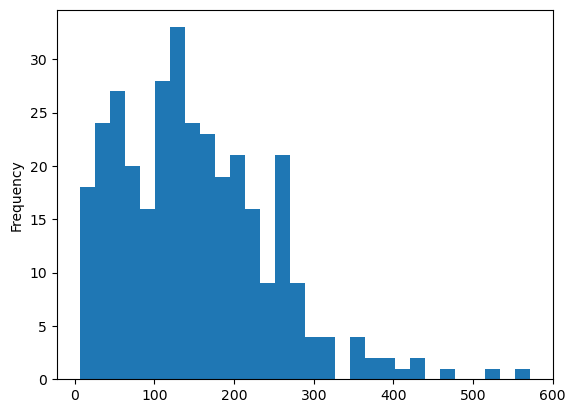

In [77]:
gdf_end['count'].plot.hist(bins = 30)

# 5. Analysis

Based on both the start and end staiton maps, the majority of stations are in Manhattan, and this is also where all the busiest stations are as well. The remaining stations are in Brooklyn. To get a better look at station usage and the most popular stations, I also sorted the start and end station DFs by head and made histograms. From these it is clear that most stations have under 300 visits, both as start and end stations. There is also a lot of overlap between the top 20 start and end stations; there are only 4 top start stations that do not also appear in the top end stations list. This does make me wonder how station usage may vary between subscribers and non-subscribers, and what is in the area of those stations. Are they popular tourist destinations? Are they areas that are difficult to reach by other modes of transport? 